# HSV Color Space, Balloons

### Import Libraries and Display Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

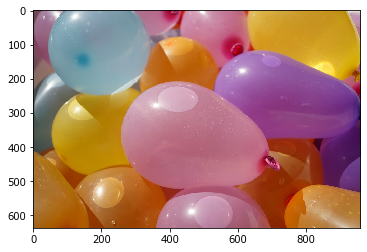

In [3]:
# Read Input Image
image = cv2.imread('images/water_balloons.jpg')

# Make a copy
image_copy = np.copy(image)

# BGR -> RGB
image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display Image
plt.imshow(image)

### Plot Color Channels

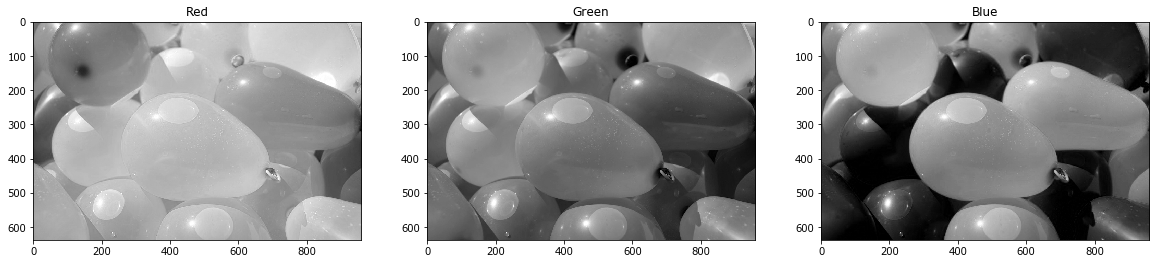

In [4]:
# RGB Channels
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

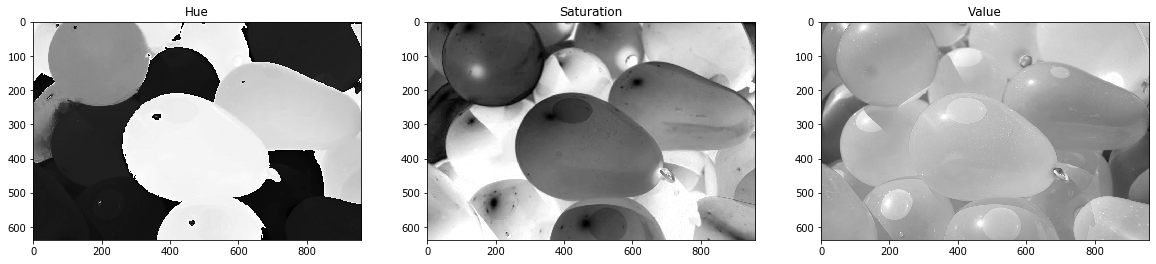

In [5]:
# HSV Channels
# Convert RGB -> HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV Channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

### Define pink and hue selection thresholds

In [6]:
# RGB Threshold
lower_pink = np.array([180, 0, 100])
upper_pink = np.array([255, 255, 230])

# HSV Threshold
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

### Mask the Image

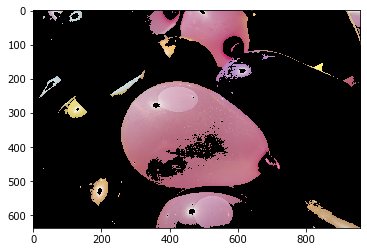

In [11]:
# RGB Mask
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# Mask the image
masked_image = np.copy(image)
masked_image[mask_rgb == 0] = [0, 0, 0]

# Visualize Mask
plt.imshow(masked_image)

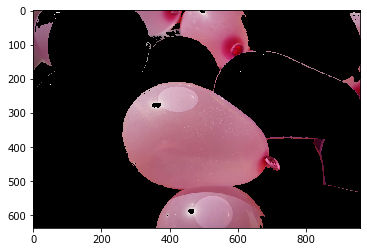

In [16]:
# HSV Mask
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# Mask the Image and Convert result to RGB
masked_image = np.copy(hsv) 
masked_image[mask_hsv == 0] =[0, 0, 0]
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_HSV2RGB)

# Visualize the Mask
plt.imshow(masked_image)